In [127]:
import numpy as np
import pandas as pd

#imputer
from sklearn.impute import KNNImputer

#encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#trasfrom
from sklearn.preprocessing import PowerTransformer

#model traing , hyperparamter
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
#model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

#data visulation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

### data gathering

In [2]:
df = pd.read_csv('Loan_Default_Prediction (1).csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [59]:
df.drop(['year'], axis =1 , inplace= True)

In [60]:
df['ID'] = df['ID'].astype(str)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  object 
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges            109028 non-null  float64
 13  term                       14

### EDA

In [62]:
df.isnull().sum()

ID                               0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                 

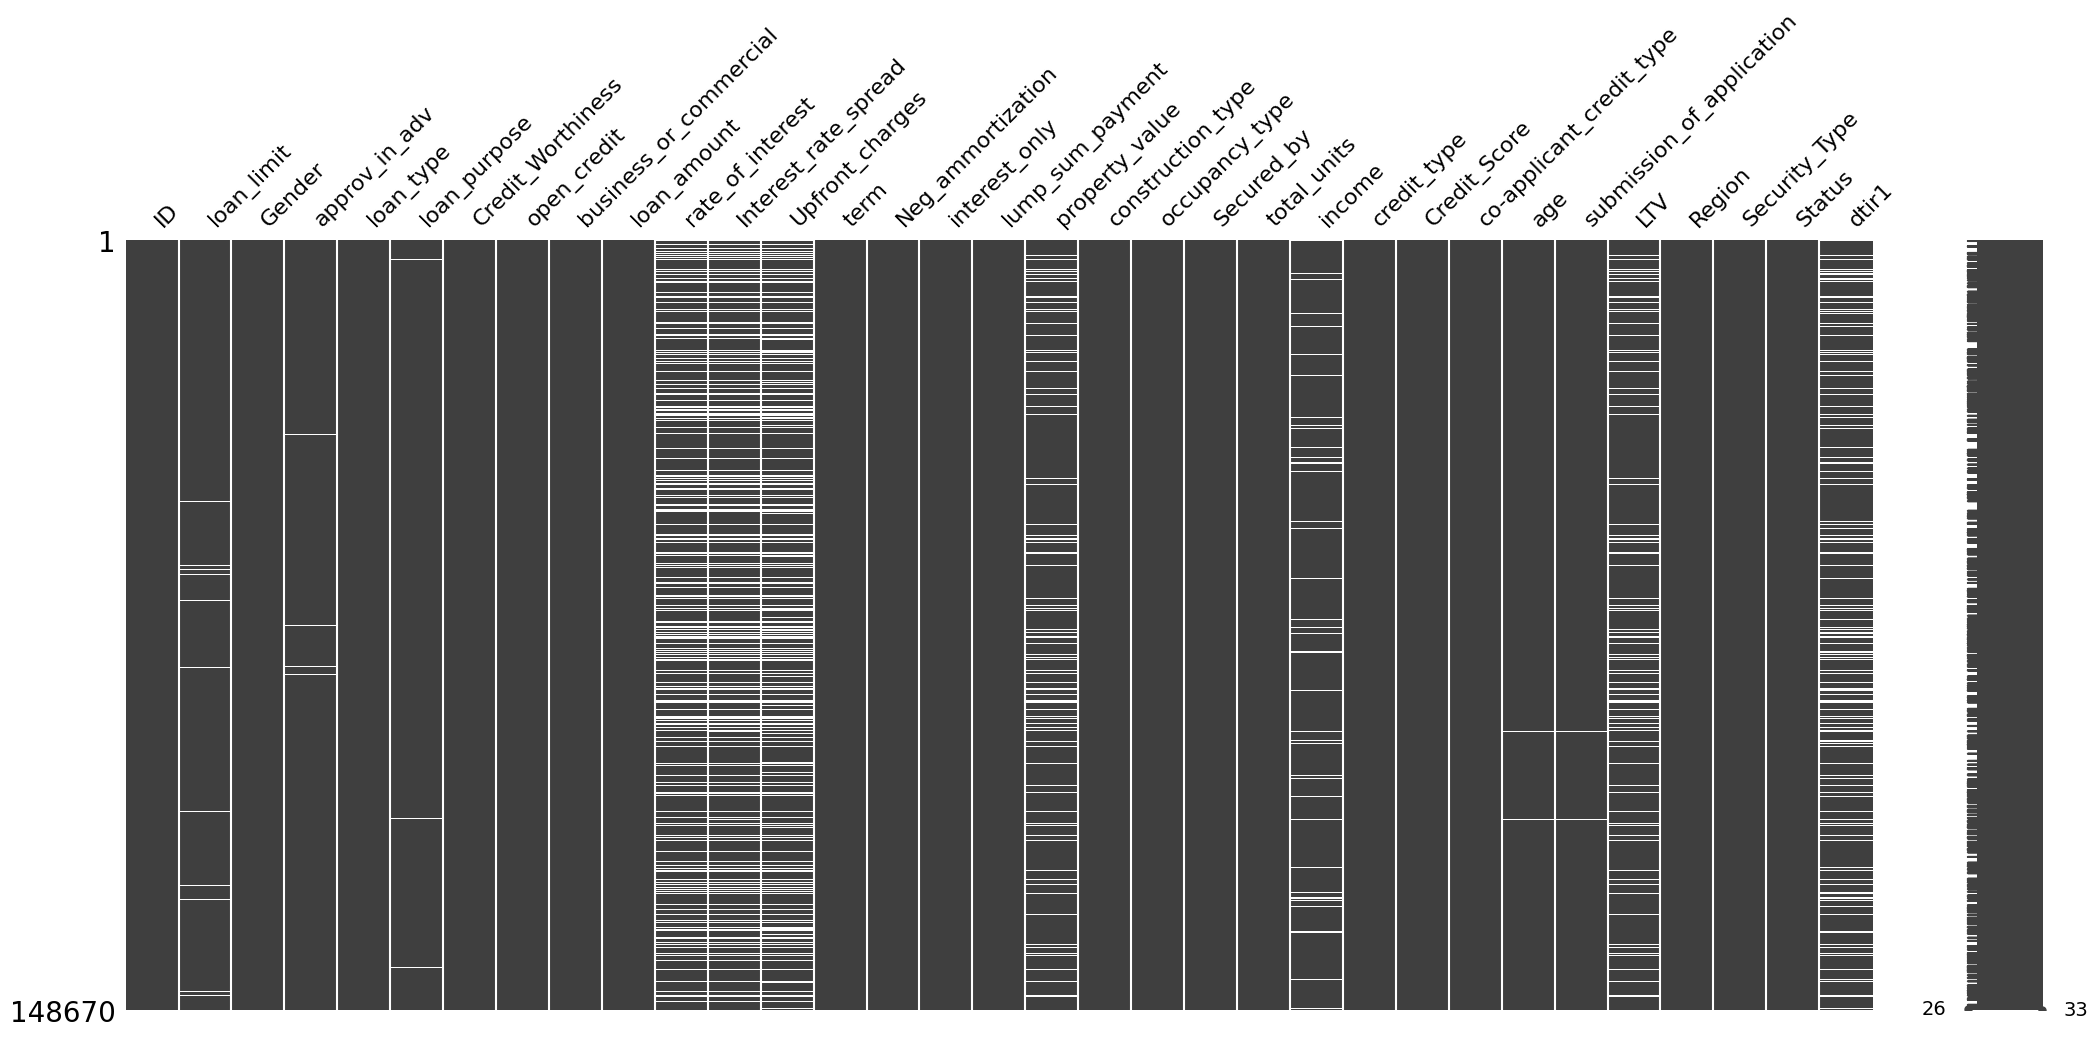

<Figure size 1500x900 with 0 Axes>

In [63]:
msno.matrix(df)
plt.figure(figsize=(15,9))
plt.show()

In [70]:
df_num = df.select_dtypes(include=[int, float])
df_cat = df.select_dtypes(include= object)

In [71]:
num_columns = df_num.columns

In [72]:
#knnimputer

imputer = KNNImputer(n_neighbors=3)

array = imputer.fit_transform(df_num)    
df_num =  pd.DataFrame(array,columns= num_columns)

In [73]:
df_num.isnull().sum()

loan_amount             0
rate_of_interest        0
Interest_rate_spread    0
Upfront_charges         0
term                    0
property_value          0
income                  0
Credit_Score            0
LTV                     0
Status                  0
dtir1                   0
dtype: int64

#### categorical missing values

In [74]:
cat_col = df_cat.columns.tolist()

for i in cat_col:
    mode = df_cat[i].mode()[0]
    df_cat[i].fillna(mode , inplace  = True)

In [18]:
# df_cat.isnull().sum()

In [ ]:
new_df = pd.concat([df_num,df_cat], axis =1)

In [17]:
# new_df.isnull().sum()

In [ ]:
new_df.to_csv('new_loan.csv', index= False)

In [4]:
df = pd.read_csv('new_loan.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amount                148670 non-null  float64
 1   rate_of_interest           148670 non-null  float64
 2   Interest_rate_spread       148670 non-null  float64
 3   Upfront_charges            148670 non-null  float64
 4   term                       148670 non-null  float64
 5   property_value             148670 non-null  float64
 6   income                     148670 non-null  float64
 7   Credit_Score               148670 non-null  float64
 8   LTV                        148670 non-null  float64
 9   Status                     148670 non-null  float64
 10  dtir1                      148670 non-null  float64
 11  ID                         148670 non-null  int64  
 12  loan_limit                 148670 non-null  object 
 13  Gender                     14

In [6]:
df.columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1', 'ID', 'loan_limit', 'Gender', 'approv_in_adv',
       'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=148670, step=1)

In [8]:
# outielrs
df_num = df.select_dtypes(include=[int, float])
df_cat = df.select_dtypes(include= object)

In [9]:
df_num.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1,ID
0,116500.0,3.583333,-0.031267,1386.013333,360.0,118000.000000,1740.0,758.0,98.728814,1.0,45.000000,24890
1,206500.0,3.708333,0.522967,1878.310000,360.0,251333.333333,4980.0,552.0,84.795549,1.0,34.666667,24891
2,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,0.0,46.000000,24892
3,456500.0,4.250000,0.681000,704.900000,360.0,658000.000000,11880.0,587.0,69.376900,0.0,42.000000,24893
4,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602.0,91.886544,0.0,39.000000,24894


In [10]:
# checking outliers for numeric feature using bivariant analysis

df['Status'] = df['Status'].astype(str)

In [11]:
df['term'] = df['term'].astype(float)
df['term'].value_counts()

term
360.0    121703
180.0     12982
240.0      5863
300.0      2829
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       186
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        75
204.0        59
264.0        43
108.0        33
192.0        17
252.0         8
320.0         2
280.0         2
340.0         2
292.0         1
260.0         1
165.0         1
268.0         1
272.0         1
322.0         1
Name: count, dtype: int64

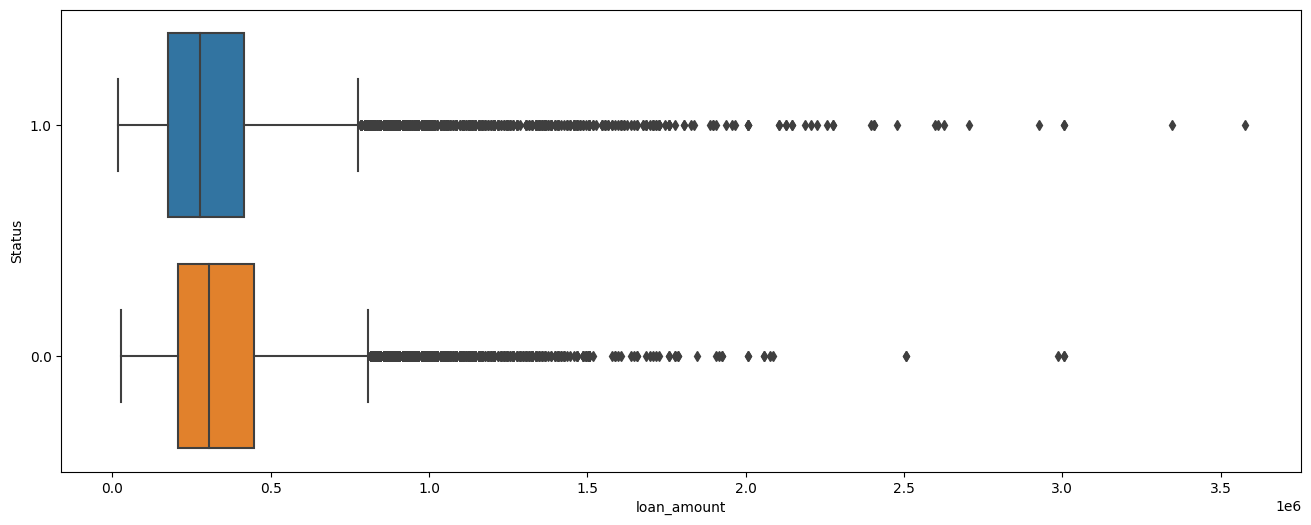

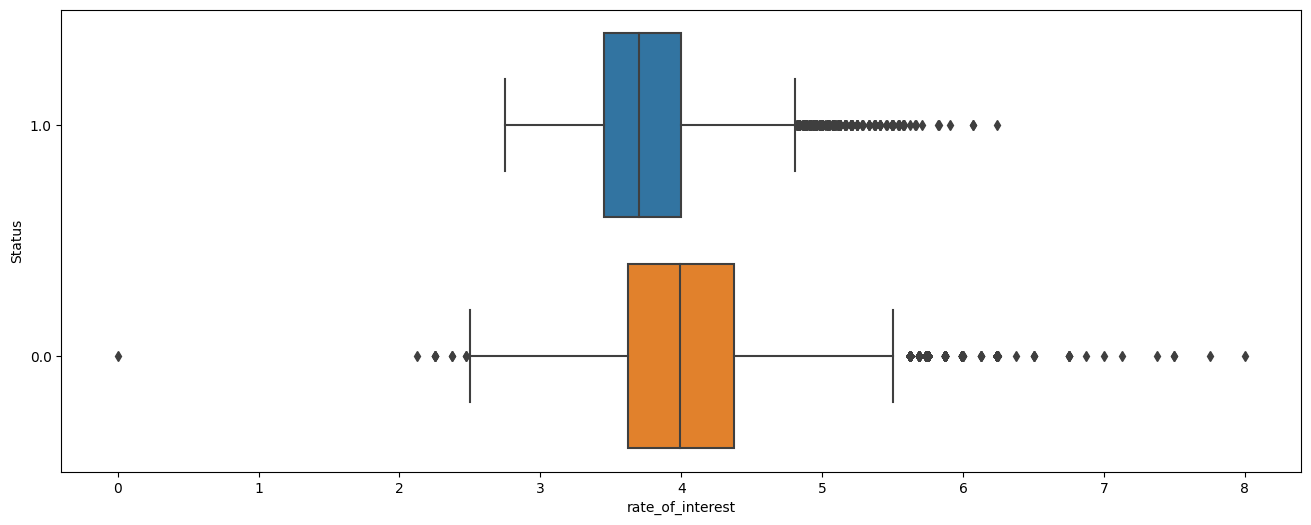

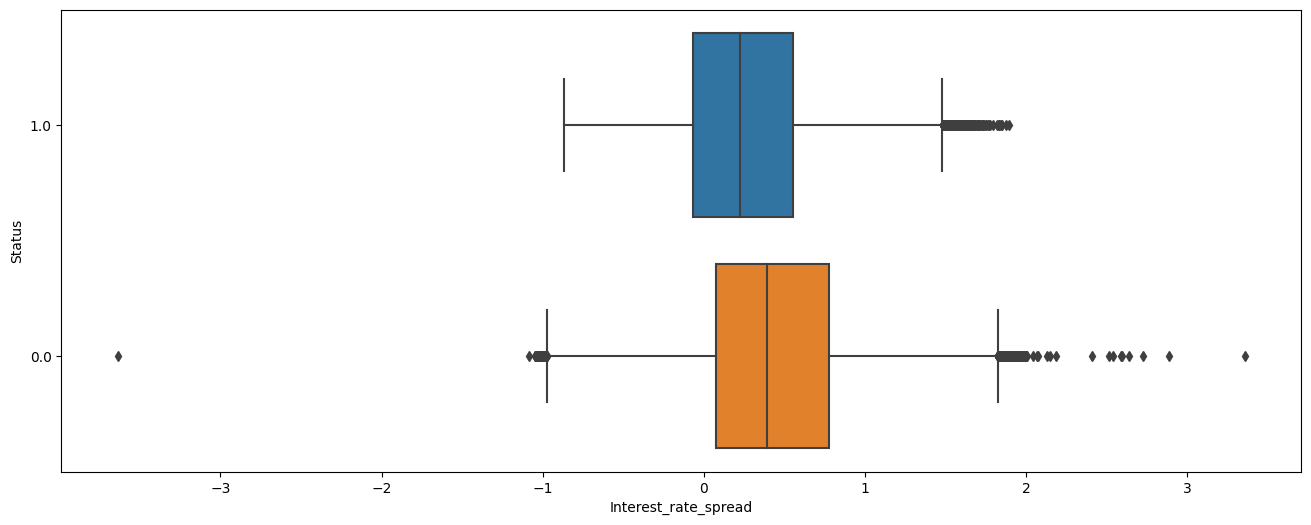

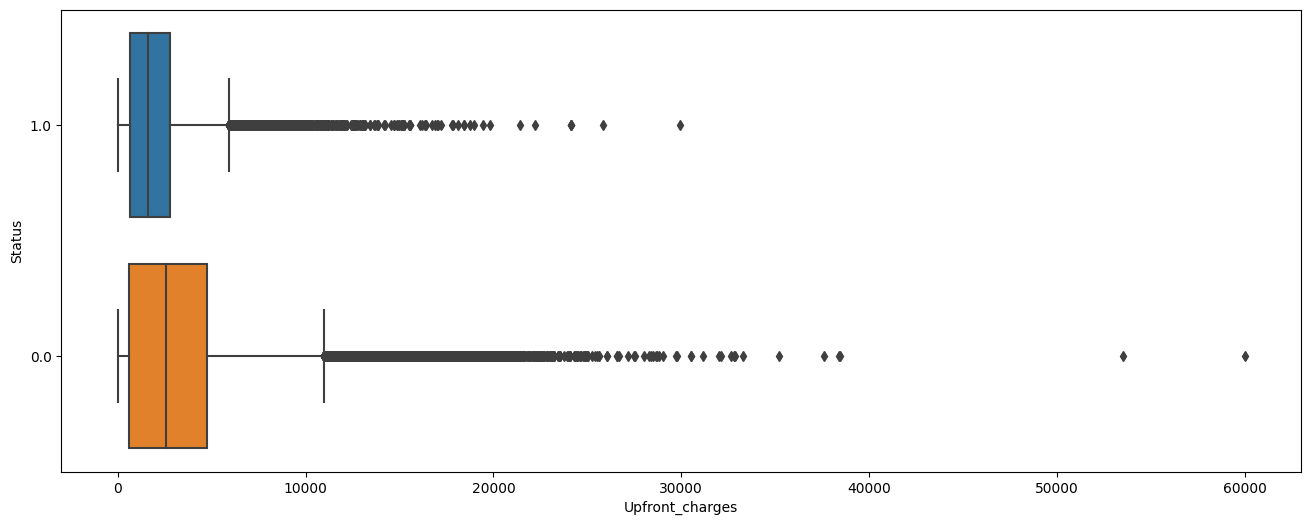

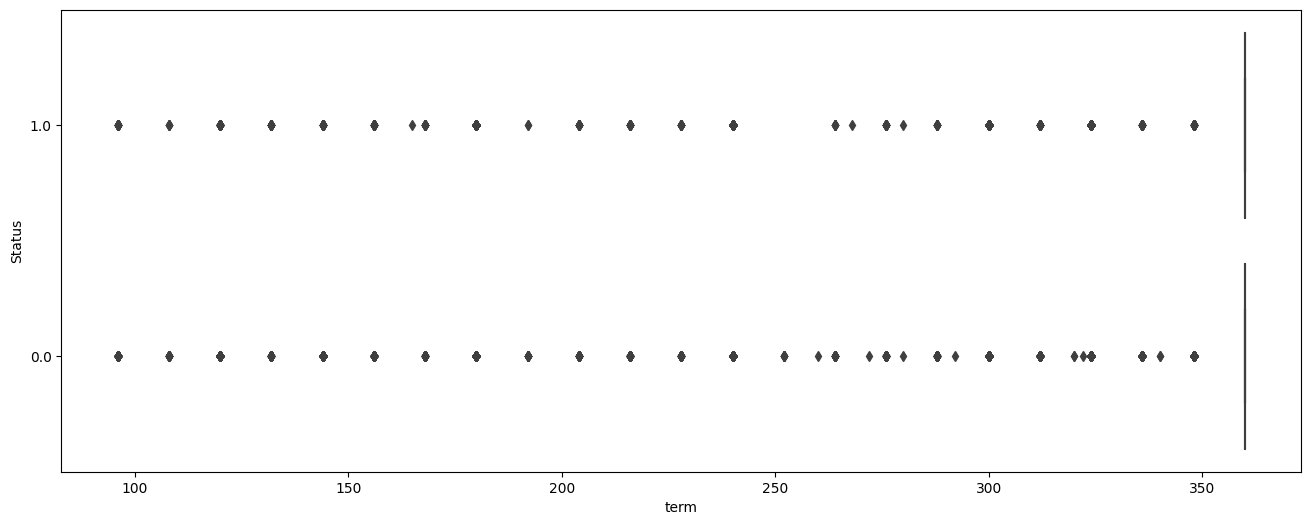

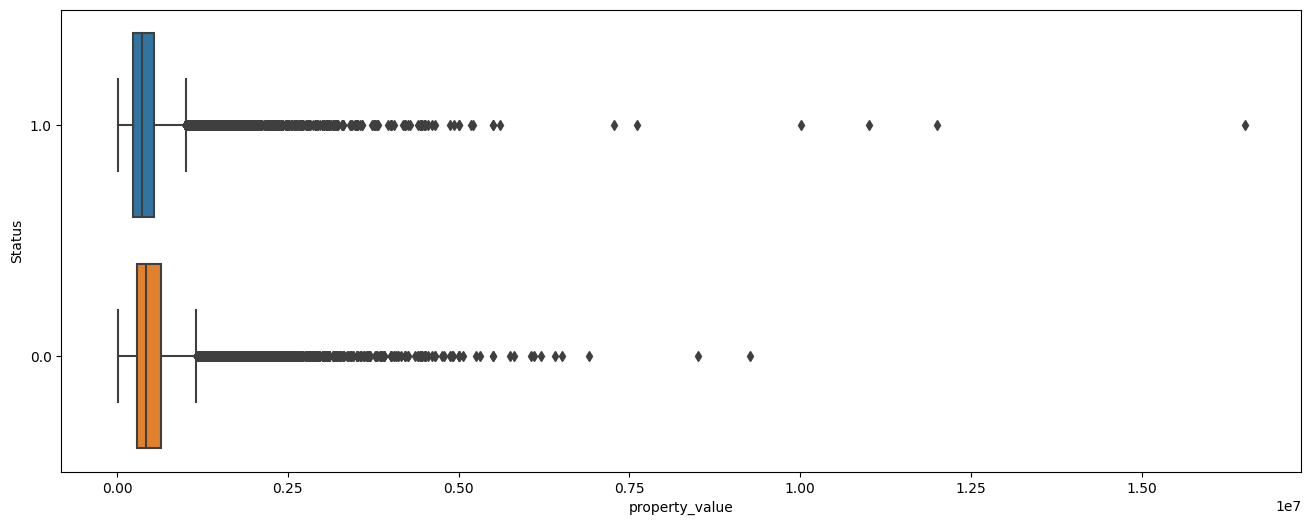

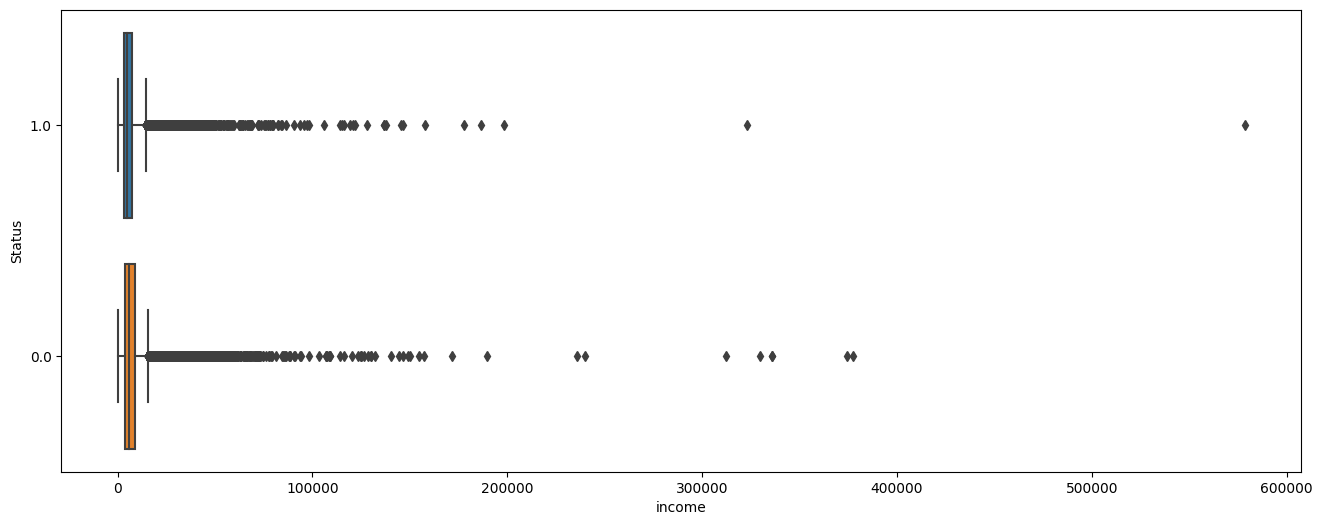

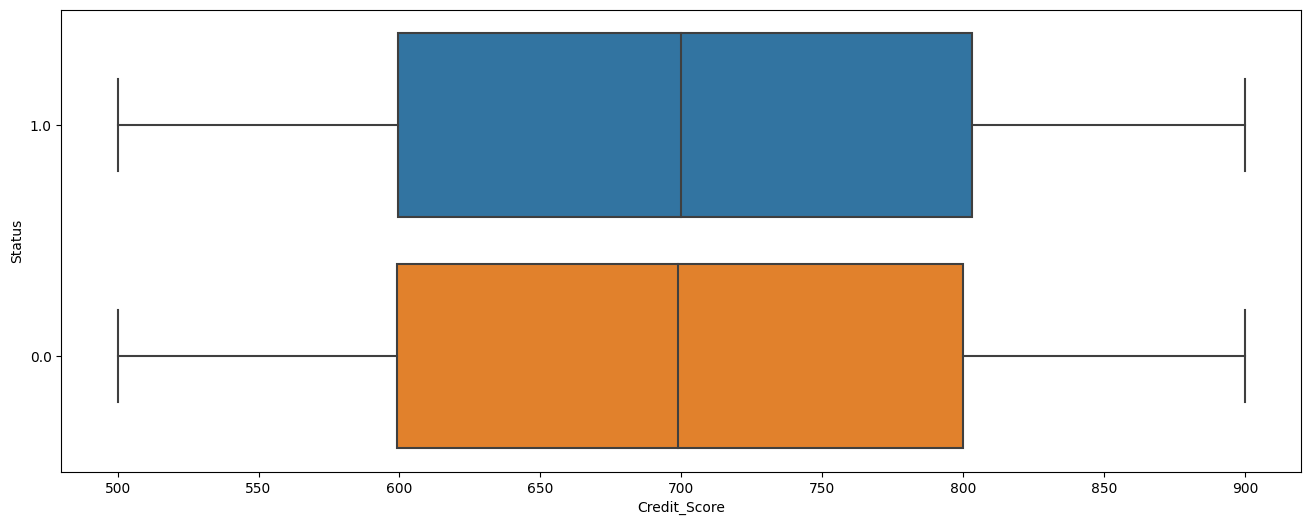

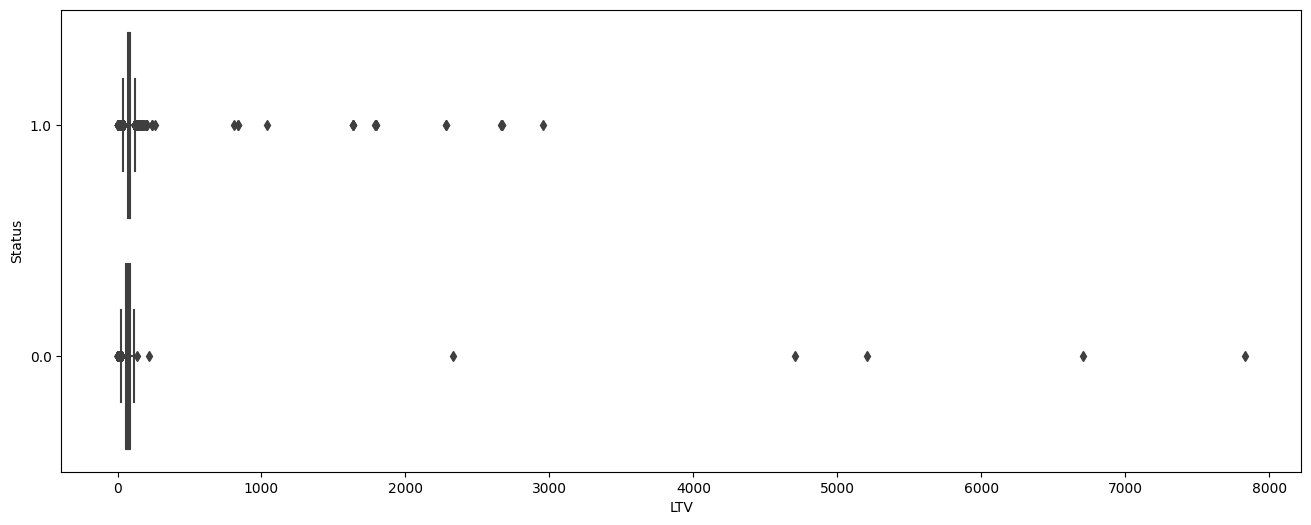

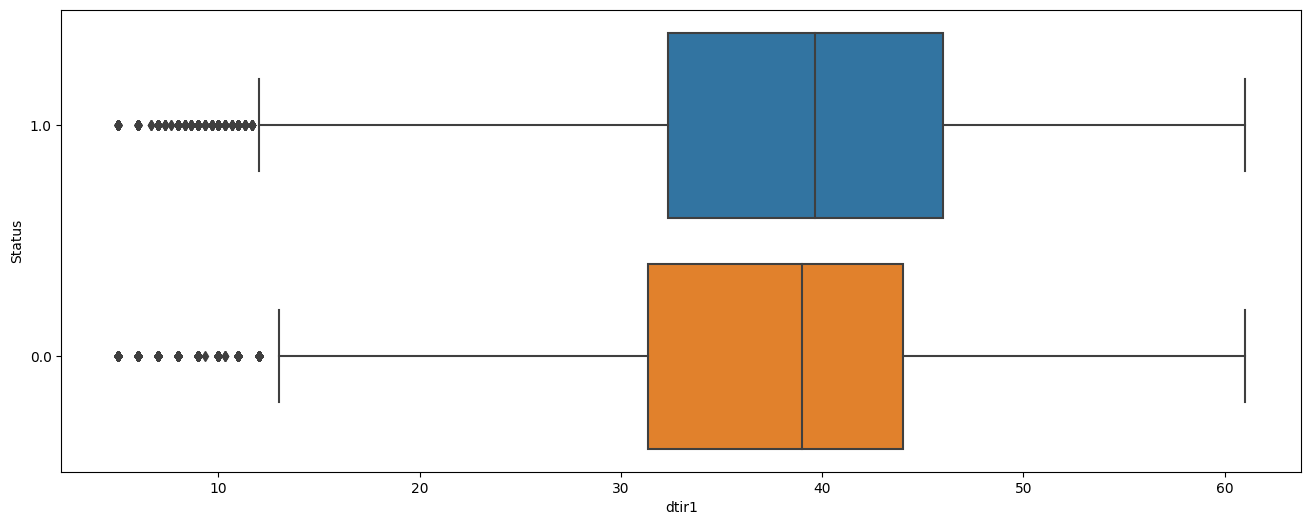

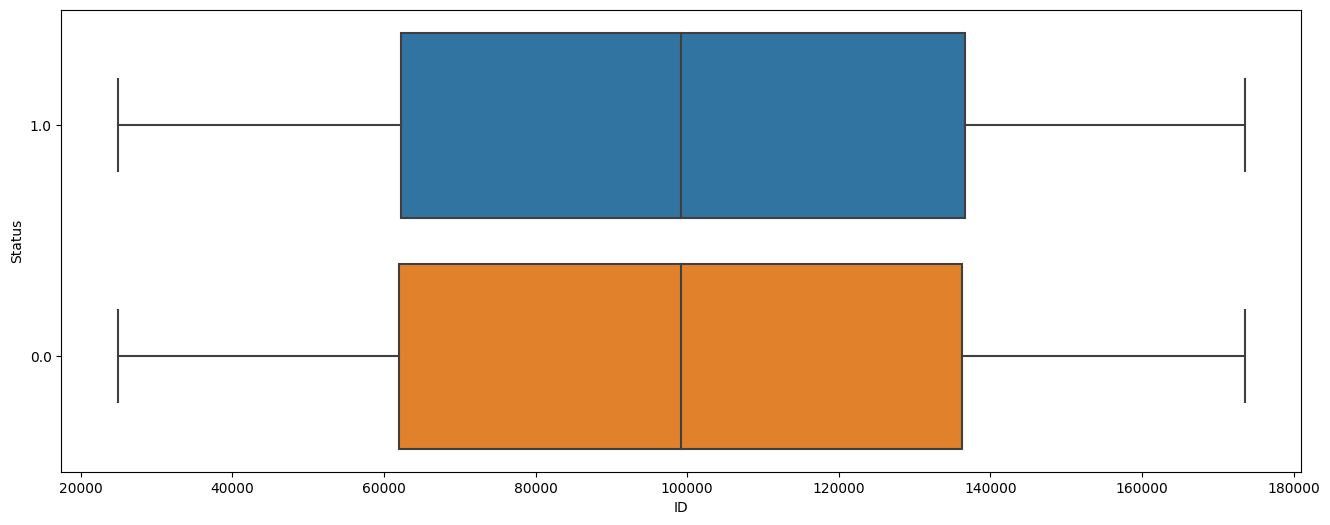

In [12]:
df_num = df_num.drop(['Status'], axis =1)
for i in df_num:
    plt.figure(figsize=(16,6))
    sns.boxplot(x = df[i], y= df['Status'])
    plt.show()

In [38]:
#trasfrom numeric data

In [126]:
# power_trasfrom = PowerTransformer() #method='yeo-johnson' #standarization
# array = power_trasfrom.fit_transform(df_num)
# df_num = pd.DataFrame(array, columns= df_num.columns)

In [101]:
#still we have outielrs after trasfromation tech we impute them

In [14]:
q1_list  = []
q2_list  = []
iqr_list = []
upper_tail_list = []
lower_tail_list = []

for i in df_num:
    q1 = np.quantile(df[i], 0.75)
    q1_list.append(q1)
    
    q2 = np.quantile(df[i], 0.25)
    q2_list.append(q2)
    
    iqr = q1 - q2
    iqr_list.append(q1 - q2)
    
    upper_tail = q1 + 1.5*iqr
    upper_tail_list.append(upper_tail)
    
    lower_tail = q2 - 1.5*iqr
    lower_tail_list.append(lower_tail)
    
outiers_value  = pd.DataFrame({'q1':q1_list , 'q2' : q2_list , 
                               'iqr':iqr_list ,'upper_tail':upper_tail_list,
                              'lower_tail' : lower_tail_list}, index= df_num.columns)
outiers_value 

,q1,q2,iqr,upper_tail,lower_tail
loan_amount,436500.000000,196500.000000,240000.000000,7.965000e+05,-163500.000000
rate_of_interest,4.371667,3.621667,0.750000,5.496667e+00,2.496667
Interest_rate_spread,0.716792,0.038700,0.678092,1.733929e+00,-0.978438
Upfront_charges,4217.660000,631.480000,3586.180000,9.596930e+03,-4747.790000
term,360.000000,360.000000,0.000000,3.600000e+02,360.000000
property_value,608000.000000,268000.000000,340000.000000,1.118000e+06,-242000.000000
income,8460.000000,3780.000000,4680.000000,1.548000e+04,-3240.000000
Credit_Score,800.000000,599.000000,201.000000,1.101500e+03,297.500000
LTV,87.133891,62.566138,24.567754,1.239855e+02,25.714507
dtir1,45.000000,32.000000,13.000000,6.450000e+01,12.500000


In [167]:
upper_tail = 7.965000e+05
lower_tail = -163500.000000
median = df_num.loc[(df_num['loan_amount'] < upper_tail)  , 'loan_amount'].median()
df_num.loc[(df_num['loan_amount'] > upper_tail) , 'loan_amount'] = median

In [176]:
upper_tail = 5.496667e+00
lower_tail = 2.496667
median = df_num.loc[(df_num['rate_of_interest'] < upper_tail) & (df_num['rate_of_interest'] > lower_tail ) ,'rate_of_interest'].median()
df_num.loc[(df_num['rate_of_interest'] > upper_tail) | (df_num['rate_of_interest'] < lower_tail )  , 'rate_of_interest'] = median

In [177]:
# Interest_rate_spread
upper_tail = 1.733929e+00
lower_tail = -0.978438
median = df_num.loc[(df_num['Interest_rate_spread'] < upper_tail) & (df_num['Interest_rate_spread'] > lower_tail ) ,'Interest_rate_spread'].median()
df_num.loc[(df_num['Interest_rate_spread'] > upper_tail) | (df_num['Interest_rate_spread'] < lower_tail )  , 'Interest_rate_spread'] = median

In [178]:
# Upfront_charges
upper_tail = 9.596930e+03
lower_tail = -4747.790000
median = df_num.loc[(df_num['Upfront_charges'] < upper_tail) & (df_num['Upfront_charges'] > lower_tail ) ,'Upfront_charges'].median()
df_num.loc[(df_num['Upfront_charges'] > upper_tail) | (df_num['Upfront_charges'] < lower_tail )  , 'Upfront_charges'] = median

In [179]:
# property_value
upper_tail = 1.118000e+06
lower_tail = -242000.000000
median = df_num.loc[(df_num['property_value'] < upper_tail) & (df_num['property_value'] > lower_tail ) ,'property_value'].median()
df_num.loc[(df_num['property_value'] > upper_tail) | (df_num['property_value'] < lower_tail )  , 'property_value'] = median

In [181]:
# income
upper_tail = 1.548000e+04
lower_tail = -3240.000000
median = df_num.loc[(df_num['income'] < upper_tail) & (df_num['income'] > lower_tail ) ,'income'].median()
df_num.loc[(df_num['income'] > upper_tail) | (df_num['income'] < lower_tail )  , 'income'] = median

In [182]:
# Credit_Score
upper_tail = 1.101500e+03
lower_tail = -297.500000
median = df_num.loc[(df_num['Credit_Score'] < upper_tail) & (df_num['Credit_Score'] > lower_tail ) ,'Credit_Score'].median()
df_num.loc[(df_num['Credit_Score'] > upper_tail) | (df_num['Credit_Score'] < lower_tail )  , 'Credit_Score'] = median

In [183]:
# LTV
upper_tail = 1.239855e+02
lower_tail = 25.714507
median = df_num.loc[(df_num['LTV'] < upper_tail) & (df_num['LTV'] > lower_tail ) ,'LTV'].median()
df_num.loc[(df_num['LTV'] > upper_tail) | (df_num['LTV'] < lower_tail )  , 'LTV'] = median

In [184]:
# dtir1
upper_tail = 6.450000e+01
lower_tail = 12.500000
median = df_num.loc[(df_num['dtir1'] < upper_tail) & (df_num['dtir1'] > lower_tail ) ,'dtir1'].median()
df_num.loc[(df_num['dtir1'] > upper_tail) | (df_num['dtir1'] < lower_tail )  , 'dtir1'] = median

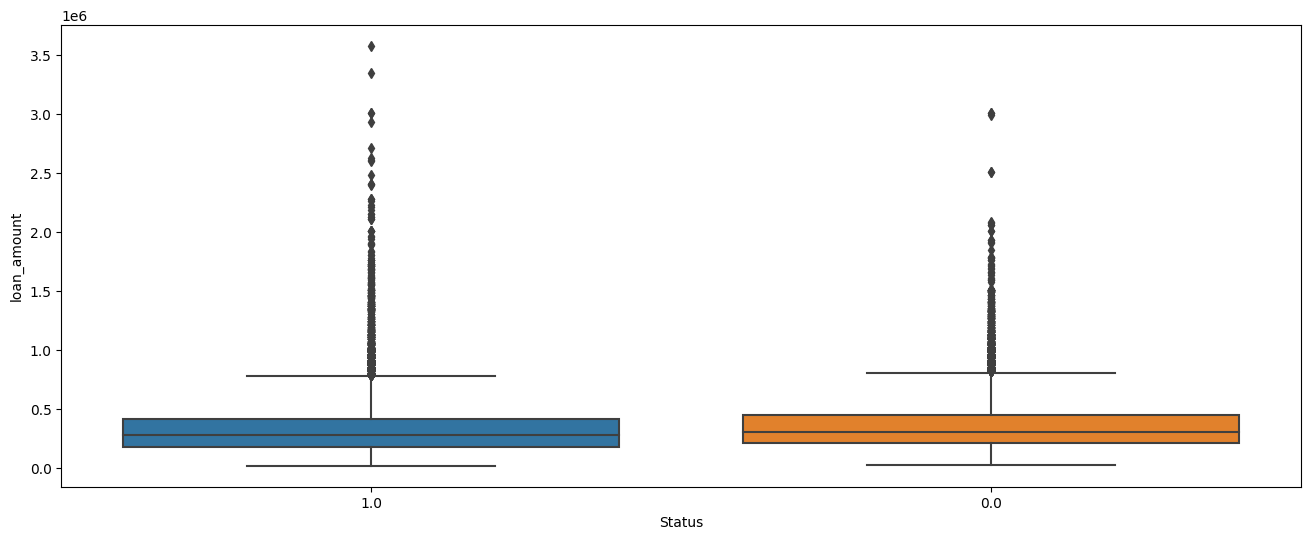

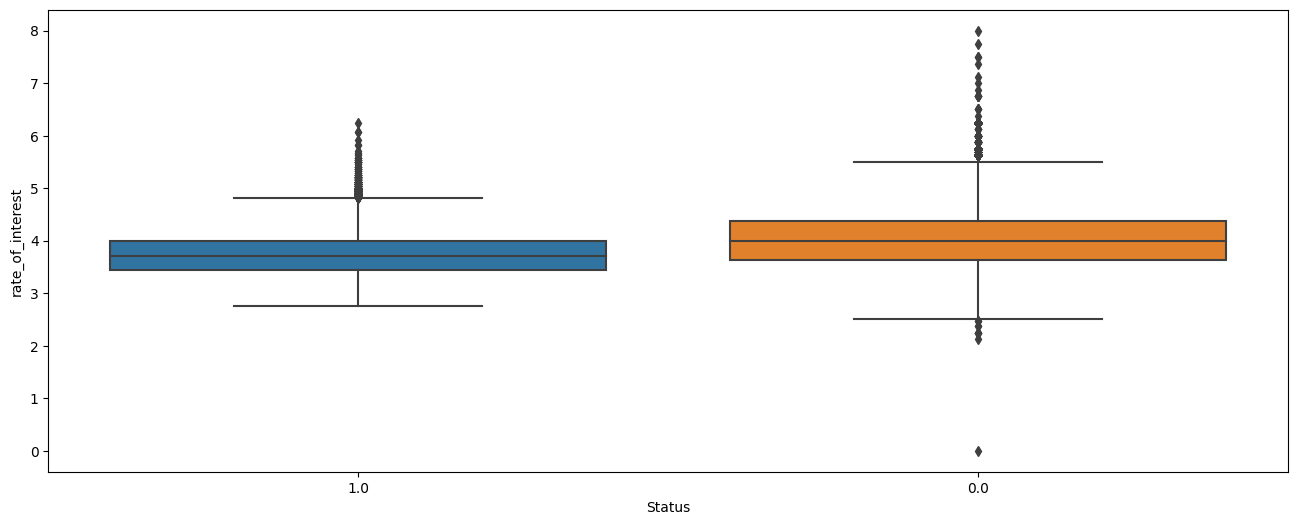

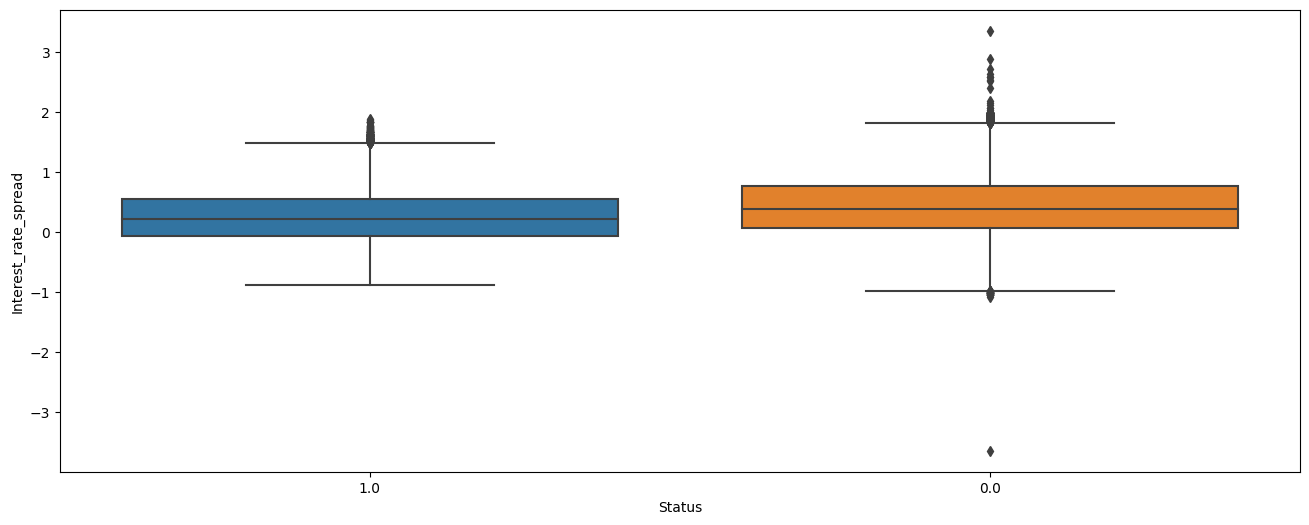

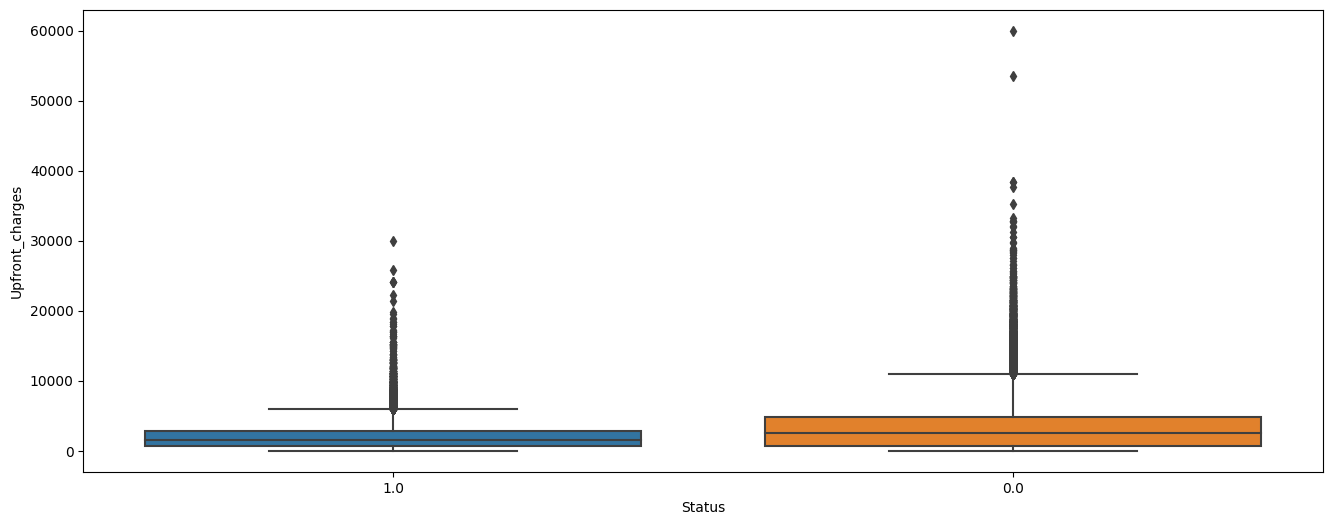

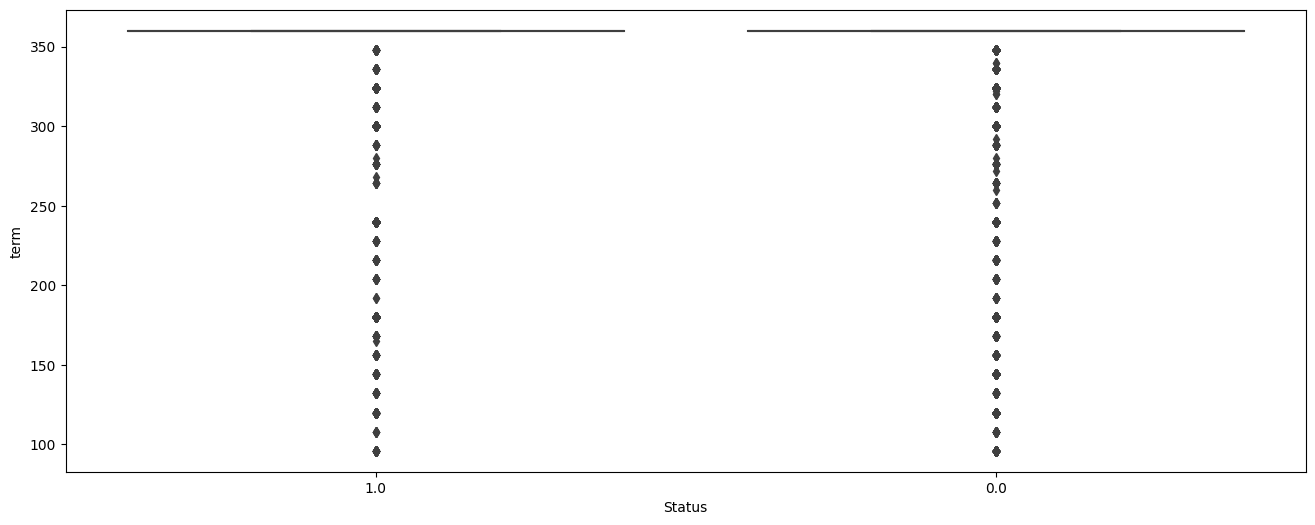

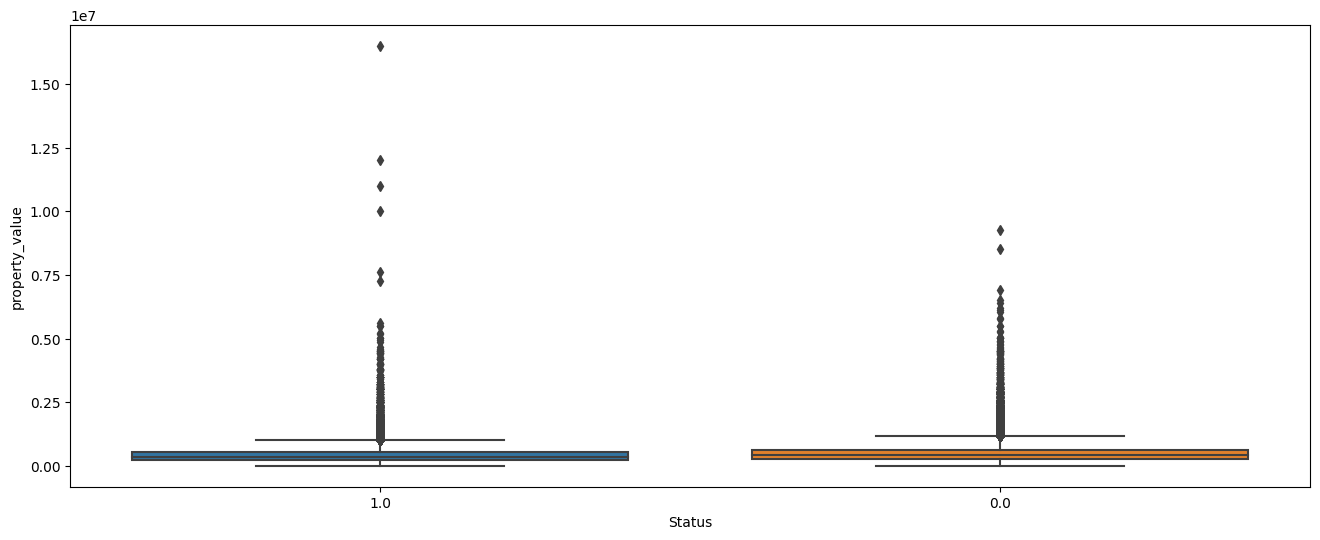

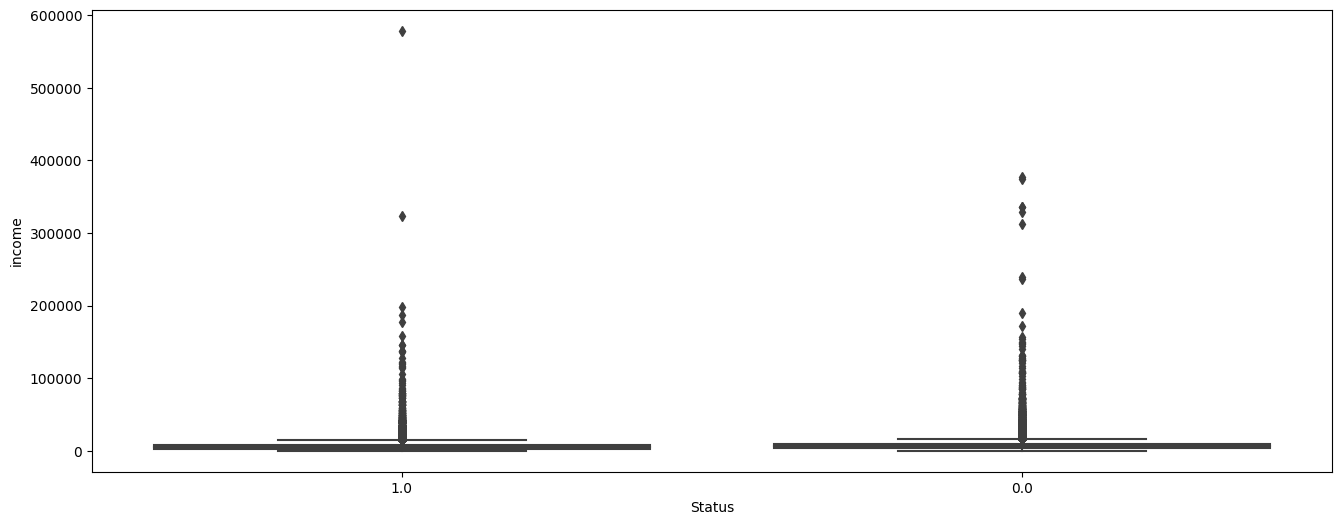

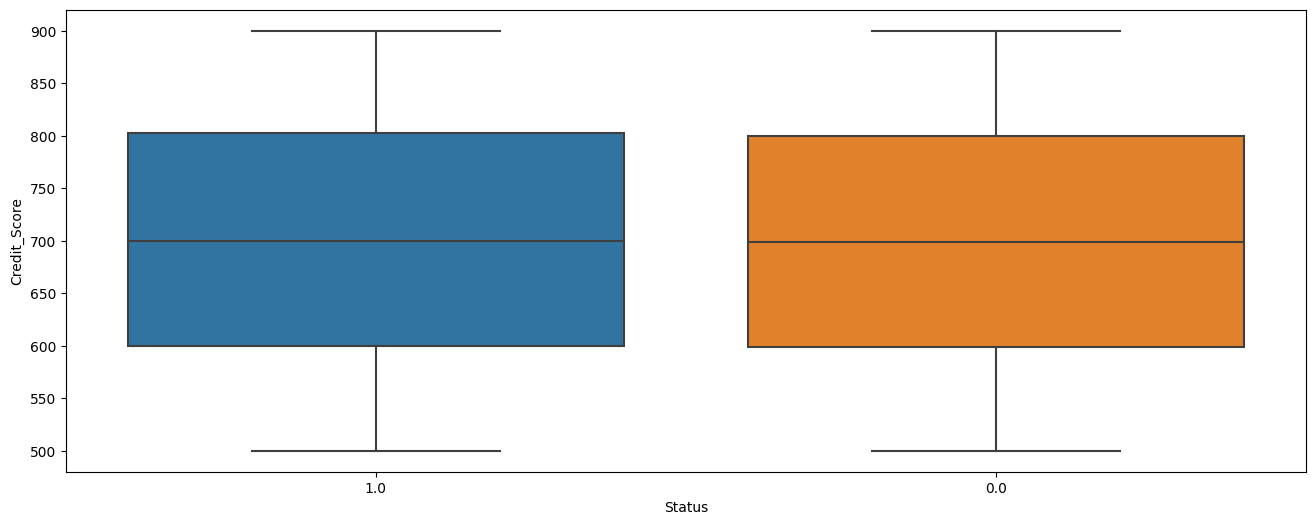

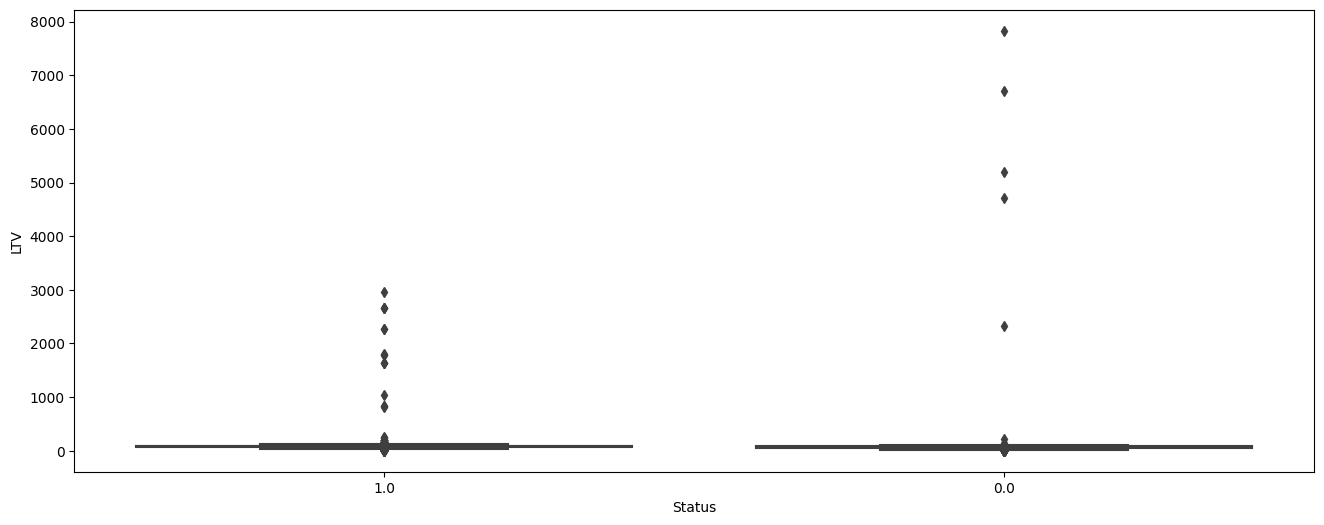

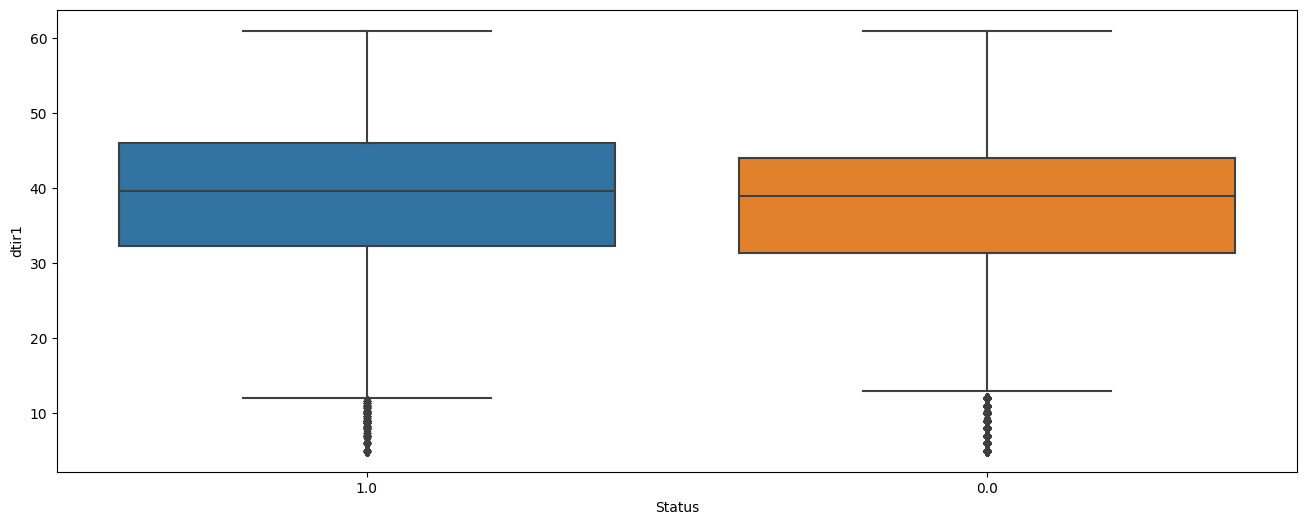

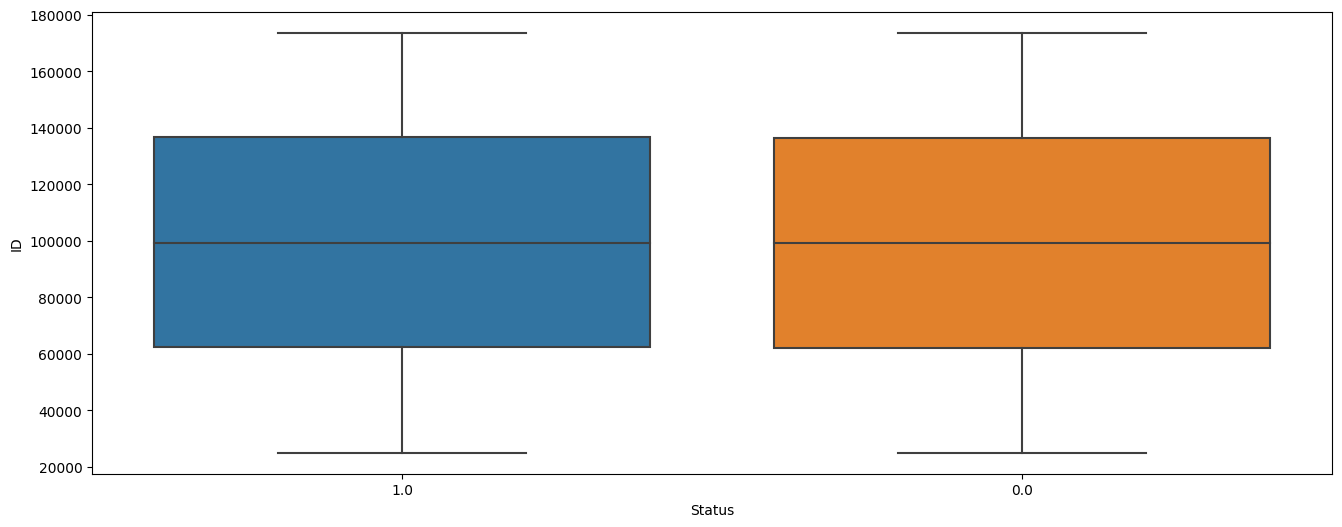

In [191]:
for i in df_num:
    plt.figure(figsize=(16,6))
    sns.boxplot(x = df['Status'], y= df[i])
    plt.show()

In [ ]:
#still we have outliers so we can drop those row    

In [15]:
#loan_amount
upper_tail = 796500.0
loan_amount_index = np.where(df_num['loan_amount'] > upper_tail)[0]  
len(loan_amount_index)

1895

In [16]:
#rate_of_interest
upper_tail = 5.1925
rate_of_interest_index = np.where(df_num['rate_of_interest'] > upper_tail)[0]

In [17]:
# Interest_rate_spread
upper_tail = 1.7114999999999998
Interest_rate_spread_index = np.where(df_num['Interest_rate_spread'] > upper_tail)[0]

In [18]:
#Upfront_charges
upper_tail = 8739.7675
Upfront_charges_index = np.where(df_num['Upfront_charges'] > upper_tail)[0]

In [19]:
#property_value
upper_tail = 1026333.3333333335
property_value_index = np.where(df_num['property_value'] > upper_tail)[0]

In [21]:
#income
upper_tail = 13830.0
income_index = np.where(df_num['income'] > upper_tail)[0]

In [22]:
#Credit_Score
upper_tail =  1101.5
Credit_Score_index = np.where(df_num['Credit_Score'] > upper_tail)[0]

In [23]:
#LTV
upper_tail =  121.22272830166668
LTV_index = np.where(df_num['LTV'] > upper_tail)[0]

In [24]:
#dtir1
lower_tail =  15.0
dtir1_index = np.where(df_num['dtir1'] < lower_tail)[0]

In [25]:
dict_index = {'loan_amount_index': loan_amount_index, 
              'rate_of_interest_index': rate_of_interest_index, 
             'Interest_rate_spread_index' :  Interest_rate_spread_index ,
              "Upfront_charges_index " : Upfront_charges_index ,
              'property_value_index' : property_value_index ,
              "income_index" : income_index , 
              'Credit_Score_index' : Credit_Score_index ,
              'LTV_index' : LTV_index ,
              'dtir1_index' :dtir1_index }

for keys , values in dict_index.items():
    print(keys , ':',len(values)) 

loan_amount_index : 1895
rate_of_interest_index : 2999
Interest_rate_spread_index : 766
Upfront_charges_index  : 6839
property_value_index : 7463
income_index : 10049
Credit_Score_index : 0
LTV_index : 190
dtir1_index : 4375


In [499]:
# for key, values in dict_index.items():
#     if values in df.index.tolist():
#         df.drop(index=values, inplace=True)

In [ ]:
df.drop(loan_amount_index, axis =0 , inplace= True)

In [35]:
valid_indexes = [i for i in rate_of_interest_index if i in df.index]
df.drop(valid_indexes, axis =0 , inplace= True)

In [36]:
valid_indexes = [i for i in Interest_rate_spread_index if i in df.index]
df.drop(valid_indexes, axis =0 , inplace= True)

In [37]:
valid_indexes = [i for i in property_value_index if i in df.index]
df.drop(valid_indexes, axis =0 , inplace= True)

In [38]:
valid_indexes = [i for i in income_index if i in df.index]
df.drop(valid_indexes, axis =0 , inplace= True)

In [39]:
valid_indexes = [i for i in Credit_Score_index if i in df.index]
df.drop(valid_indexes, axis =0 , inplace= True)

In [40]:
valid_indexes = [i for i in dtir1_index if i in df.index]
df.drop(valid_indexes, axis =0 , inplace= True)

In [ ]:
# new shape

In [41]:
df.shape

(127670, 33)

In [42]:
df.drop(['ID'], axis = 1,inplace = True)

### encoding

In [30]:
# loan_limit

In [43]:
df['loan_limit'].value_counts().to_dict()

{'cf': 121170, 'ncf': 6500}

In [44]:
df['loan_limit'].replace({'cf':0, 'ncf': 1}, inplace = True)

In [35]:
# Gender

In [45]:
df['Gender'].value_counts().to_dict()

{'Male': 36710, 'Joint': 33474, 'Sex Not Available': 33042, 'Female': 24444}

In [46]:
df['Gender'].replace({'Joint' : 'third gender','Sex Not Available' : 'third gender'}, inplace = True)

In [47]:
df['Gender'].value_counts().to_dict()

{'third gender': 66516, 'Male': 36710, 'Female': 24444}

In [48]:
df['Gender'].replace({'third gender': 2 , 'Male': 1 , 'Female': 0}, inplace = True)

In [43]:
#approv_in_adv

In [49]:
df['approv_in_adv'].value_counts().to_dict()

{'nopre': 107499, 'pre': 20171}

In [50]:
df['approv_in_adv'].replace({'nopre': 1, 'pre': 0 }, inplace = True)

In [51]:
df['approv_in_adv'].value_counts().to_dict()

{1: 107499, 0: 20171}

In [51]:
#loan_type

In [52]:
df['loan_type'].value_counts().to_dict()

{'type1': 94883, 'type2': 19155, 'type3': 13632}

In [53]:
df['loan_type'].replace({'type1': 1,'type2':2 , 'type3': 3}, inplace= True)

In [54]:
df['loan_type'].value_counts().to_dict()

{1: 94883, 2: 19155, 3: 13632}

In [55]:
for i in df_cat:
    data = df[i].value_counts().to_dict()
    print()
    print(i,':' , data)


loan_limit : {0: 121170, 1: 6500}

Gender : {2: 66516, 1: 36710, 0: 24444}

approv_in_adv : {1: 107499, 0: 20171}

loan_type : {1: 94883, 2: 19155, 3: 13632}

loan_purpose : {'p3': 48826, 'p4': 46809, 'p1': 29698, 'p2': 2337}

Credit_Worthiness : {'l1': 122582, 'l2': 5088}

open_credit : {'nopc': 127590, 'opc': 80}

business_or_commercial : {'nob/c': 108515, 'b/c': 19155}

Neg_ammortization : {'not_neg': 114974, 'neg_amm': 12696}

interest_only : {'not_int': 121900, 'int_only': 5770}

lump_sum_payment : {'not_lpsm': 124715, 'lpsm': 2955}

construction_type : {'sb': 127638, 'mh': 32}

occupancy_type : {'pr': 120917, 'ir': 4669, 'sr': 2084}

Secured_by : {'home': 127638, 'land': 32}

total_units : {'1U': 126311, '2U': 1010, '3U': 210, '4U': 139}

credit_type : {'CIB': 40655, 'CRIF': 37577, 'EXP': 35708, 'EQUI': 13730}

co-applicant_credit_type : {'CIB': 65648, 'EXP': 62022}

age : {'45-54': 28873, '35-44': 28252, '55-64': 27343, '65-74': 18250, '25-34': 17439, '>74': 6317, '<25': 1196}


In [69]:
#loan_purpose

In [56]:
df['loan_purpose'].value_counts().to_dict()

{'p3': 48826, 'p4': 46809, 'p1': 29698, 'p2': 2337}

In [57]:
df['loan_purpose'].replace({'p3':2 , 'p4': 3 , 'p1': 0, 'p2': 1}, inplace = True)

In [58]:
# Binary variables
binary_vars = ['Security_Type', 'submission_of_application', 'co-applicant_credit_type', 'Secured_by',
               'lump_sum_payment', 'interest_only', 'Neg_ammortization', 'construction_type', 'business_or_commercial',
               'open_credit', 'Credit_Worthiness']

### label encoding

In [595]:
# label_encoder = LabelEncoder()
# array = label_encoder.fit_transform(df['lump_sum_payment'])

In [59]:
label_encoder = LabelEncoder()
for i in binary_vars:
    df[i] = label_encoder.fit_transform(df[i])   

In [78]:
df['Status'].value_counts()

Status
0.0    95535
1.0    32135
Name: count, dtype: int64

In [82]:
df['Status'] = df['Status'].astype(float)

In [85]:
df_temp = df.select_dtypes(exclude= object)

### one hot encoding

In [86]:
df_cat_one_label = df.drop(binary_vars, axis =1)
# df.info()
df_cat_one_label = df_cat_one_label.drop(['Status'], axis = 1 )

In [87]:
df_cat_one_label = df_cat_one_label.select_dtypes(include= object)
df_cat_one_label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127670 entries, 0 to 148669
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   occupancy_type  127670 non-null  object
 1   total_units     127670 non-null  object
 2   credit_type     127670 non-null  object
 3   age             127670 non-null  object
 4   Region          127670 non-null  object
dtypes: object(5)
memory usage: 9.9+ MB


In [107]:
# pd.get_dummies(df, columns= ['loan_amount'], dtype= int)

In [88]:
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat_one_label)
df_cat_encoded = pd.DataFrame(df_cat_1hot.toarray())

In [ ]:
#error for one hot encoding large data 
#MemoryError: Unable to allocate 108. GiB for an array with shape (122363, 118603) 

In [94]:
df_temp.shape

(127670, 27)

In [95]:
df_cat_encoded.shape

(127670, 22)

In [96]:
new_df = pd.concat([df_temp, df_cat_encoded], axis =1, join= 'inner')
new_df.to_csv('final_loan.csv', index=False)

### model trainng

In [121]:
x = new_df.drop(['Status'], axis =1)
y = new_df['Status']

In [122]:
y.value_counts()

Status
0.0    82093
1.0    27601
Name: count, dtype: int64

In [123]:
x.columns = x.columns.astype(str)

In [124]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size= 0.3 , random_state= 11, stratify= y)

In [125]:
logist_clf = LogisticRegression(max_iter=1000)
knn_clf = KNeighborsClassifier()
decison_clf = DecisionTreeClassifier()
random_clf = RandomForestClassifier()
adaboost_clf = AdaBoostClassifier()

models = {'logist clf': logist_clf , 'knn clf': knn_clf,'decison clf' : decison_clf ,
         'random clf':random_clf,'adaboost clf':adaboost_clf }

In [129]:
accuracy=[]
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    accuracy.append(acc)
    print("For ",name," ,Accuracy is :",acc)

For  logist clf  ,Accuracy is : 0.7495517943419733
For  knn clf  ,Accuracy is : 0.7792397216566896
For  decison clf  ,Accuracy is : 0.923334042359233
For  random clf  ,Accuracy is : 0.9166185541949011
For  adaboost clf  ,Accuracy is : 0.8667841623871889


Text(0, 0.5, 'Accuracy')

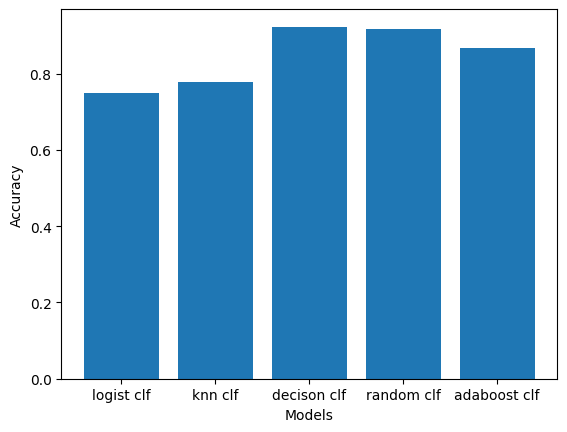

In [130]:
plt.bar(models.keys(),accuracy)
plt.xlabel("Models")
plt.ylabel("Accuracy")

### decison tree algorithm give best accuracy without hyperparameter tuning  0.923334042359233